## Stats701-001 Homework 6: `numpy` and `matplotlib`
### Taylor Spooner
#### spoonert@umich.edu

**Collaboration**: Byoung Jang helped me with the contour lines.

**Time**: Problem 1: 25 minutes, Problem 2: 45 minutes, Problem 3: 60 minutes.

### Problem 1: Warmup: plotting CLTs

#### Choose four different probability distributions with mean 0 and variance 1.  

The four distributions that I am going to chose are:
- $\sqrt{12}(\text{Unif}(0,1)-1/2)$  
- $\text{Exponential}(1) - 1$
- $(1/2)(\text{Gamma}(\alpha=2, \beta=1) - 2)$
- $(\text{Bern(.5) - .5})/\sqrt{.5(1-.5)}$

In [1]:
from scipy.stats import uniform, expon, gamma, bernoulli, norm
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt
import math

1. **Pick a reasonably large value of $n$. Make a plot with four subplots, one for each of the four distributions. For each subplot, use Numpy/Scipy to generate $m=1000$ independent draws of $\sqrt{n}(S_n - \mu)$ from that subplot's distribution and show in that subplot a (normalized) histogram of the empirical distribution of $\sqrt{n}(S_n - \mu)$.**
2. **Title each of your subplots with the name of the distribution you used for that subplot. Make sure that all four of your plots have the same scales on their x- and y-axes.**
3. **Add to each subplot a solid line indicating the density of the standard normal, so that we can see how “normal” the empirical distribution looks.**
4. ** Do all four of your plots look equally "normal"? Note that it may help to try a few different values of $n$ to explore differences between the plots, depending on which four distributions you picked.**

In [19]:
n = 100
m = 1000
# Uniform(0,1)
un = [math.sqrt(n)*np.mean(math.sqrt(12)*(uniform.rvs(size=n) - 1/2)) for x in range(m)]

In [20]:
# Exponential(1)
ex = [math.sqrt(n)*np.mean(expon.rvs(size=n)-1) for x in range(m)]

In [21]:
# Gamma(2,1)
gam = [math.sqrt(n)*np.mean((1/2)*(gamma.rvs(a=2, size=n)-2)) for x in range(m)]

In [22]:
# Bernoulli(.5)
bern = [math.sqrt(n)*np.mean((bernoulli.rvs(p=.5, size=n)-.5)/math.sqrt(.5**2)) for x in range(m)]

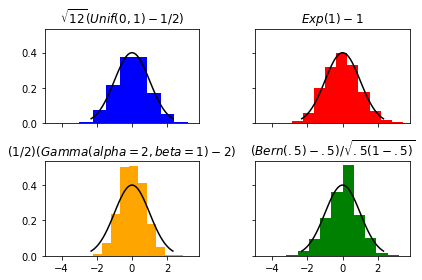

In [23]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
rv = norm()
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex = 'all', sharey = 'all')
ax1.hist(un, normed=True, color='blue')
ax1.plot(x, rv.pdf(x), color='black')
ax1.set_title("$\sqrt{12}(Unif(0,1)-1/2)$")
ax2.hist(ex, normed=True, color='red')
ax2.plot(x, rv.pdf(x), color='black')
ax2.set_title("$Exp(1) - 1$")
ax3.hist(gam, normed=True, color='orange')
ax3.plot(x, rv.pdf(x), color='black')
ax3.set_title("$(1/2)(Gamma(alpha=2, beta=1) - 2)$")
ax4.hist(bern, normed=True, color='green')
ax4.plot(x, rv.pdf(x), color='black')
ax4.set_title("$(Bern(.5) - .5)/\sqrt{.5(1-.5)}$")
plt.tight_layout()
plt.show()

##### **Question 4:**  
The uniform and exponential distributions look extremely close to the standard normal density that we plotted with the normalized histograms. The gamma distribution has must smaller tails than the normal. The values for the gamma distribution are much more consintrated around 0 than the standard normal. Finally, the Bernoulli distribution looks the least normal. When $n$ was between 20-30, the bernoulli distribution varied from the standard normal a lot. We increased $n$ so the distribution looked closer to what we expected.

### Problem 2: Plotting a Mixture of Normals  

1. **Read in the two files `labels.npy` and `points.dlm` into `numpy`.**

In [7]:
points = np.loadtxt('points.dlm', delimiter='\t')

In [8]:
type(points)

numpy.ndarray

In [9]:
points.shape

(100, 2)

In [10]:
points[0:5,]

array([[ 0.4579593 ,  0.54352873],
       [ 0.08891206,  0.76618616],
       [ 0.1464601 ,  0.78467006],
       [ 0.64990065,  0.19183258],
       [ 0.57086316,  0.40393525]])

In [11]:
labs = np.load('labels.npy')

In [12]:
type(labs)

numpy.ndarray

In [13]:
len(labs)

100

In [14]:
labs[0:5]

array([ 0.,  0.,  0.,  0.,  1.])

#### 2. Generate a scatter plot of the data.
  - Each data point should appear as an `x` (often called a cross in data visualization packages) 
  - colored according to its cluster membership as given by points.npy. 
    - cluster label 0 should be colored blue
    - cluster label 1 should be colored red 
  - Set the x and y axes to both range from 0 to 1. 
  - Adjust the size of the point markers to what you believe to be reasonable (i.e., aesthetically pleasing, visible, etc)
 
#### 3. Theoretically, the data should approximate a mixture of normals with means and covariance matrices given by
$$\mu_0 = (0.2, 0.7)^T, \;
\Sigma_0=
  \begin{bmatrix}
    0.015 & -0.011\\
    -0.011 & 0.018
  \end{bmatrix}$$
$$\mu_1 = (0.65, 0.3)^T, \;\Sigma_1 = \begin{bmatrix} 0.016 & -0.011 \\ -0.011 & 0.016 \end{bmatrix}$$

**For each of these two normal distributions, add two contour lines corresponding to 1 and 2 "standard deviations" of the distribution. The contour lines for cluster 0 should be colored blue, and the lines for cluster 1 should be colored red. The contour lines will go off the edge of the 1-by-1 square that we have plotted. Do not worry about that.**  

#### 4. Do the data appear normal? There should be at least one obvious outlier. Add an annotation to your figure indicating one or more such outlier(s).

In [15]:
# Set up the contours
from scipy.stats import multivariate_normal

First thing we will do is set up our two distributions.

In [16]:
# Create the mean and covariance arrays for both distributions
mu_0 = np.array([0.2, 0.7])
mu_1 = np.array([0.65, 0.3])
Sigma_0 = np.array([[0.015, -0.011], [-0.011, 0.018]])
Sigma_1 = np.array([[0.016, -0.011], [-0.011, 0.016]])
mvn0 = multivariate_normal(mu_0, Sigma_0)
mvn1 = multivariate_normal(mu_1, Sigma_1)

Now we will calculate the levels. To do so we set the equation: $(x-\mu)^T\Sigma^{-1}(x-\mu) = \chi^2_2(p)$, where $p$ is going to be the probability of interest. We will then find the level by evaluating the bivariate pdf but replacing the $(x-\mu)^T\Sigma^{-1}(x-\mu)$ with $\chi^2_2(p)$. We looked up the chi-square values for $p = 0.68, 0.95$ to be 2.28 and 5.99 respectively.

In [17]:
def level(Sigma, chisq):
    '''Function to return the bivariate normal pdf but replacing the quadtratic part with chi sq test stat.'''
    return lg.det(2*np.pi*Sigma)**(-.5)*np.exp(-.5*chisq)

# First distribution
l00 = level(Sigma_0, 2.28)
l01 = level(Sigma_0, 5.99)
# Second distribution
l10 = level(Sigma_1, 2.28)
l11 = level(Sigma_1, 5.99)

Now we plot.

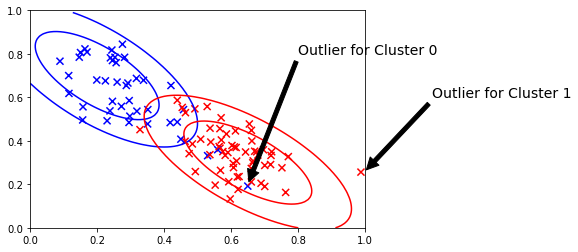

In [18]:
cols = list(map(lambda x: 'blue' if x ==0 else 'red', labs))
# Use c = labs and cmap to change color based on a value. But how do you control the color value???
plt.scatter(points[:,0], points[:,1], marker = 'x', color=cols, s=50)
plt.xlim([0,1])
plt.ylim([0,1])

# Grid of points from 0 to 1
x,y = np.mgrid[0:1:0.01, 0:1:0.01]
pos0 = np.empty(x.shape + (2,))
# Contour plot for cluster 0
pos0[:,:,0] = x
pos0[:,:,1] = y

plt.contour(x, y, mvn0.pdf(pos0), levels = [l01, l00], colors="blue")
# Contour plot for cluster 1
pos1 = np.empty(x.shape + (2,))
pos1[:,:,0] = x
pos1[:,:,1] = y

plt.contour(x, y, mvn1.pdf(pos1), levels = [l11, l10], colors='red')

# Annotate the graph
plt.annotate('Outlier for Cluster 1', xy=(1,.26), xytext=(1.2,.6), fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.02))
plt.annotate('Outlier for Cluster 0', xy=(.65,.2), xytext=(.8,.8), fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.02))
plt.show()

#### 4. Do the data appear normal? There should be at least one obvious outlier. Add an annotation to your figure indicating one or more such outlier(s).

Yes! The data do appear normal. About 95% of the data falls within the two standard deviations (the second contour line) and the data are more dense in the middle (especially for the red cluster). There are some obvious outliers, which we have annotated. Cluster 0 seems to have more outliers than Cluster 1. 

### Problem 3: Conway's Game of Life
The game is played on an $m$-by-$n$ board, which we will represent as an $m$-by-$n$ matrix. The game proceeds in steps. At any given time, each cell on the board (i.e., entry of our matrix), is either alive (which we will represent as a 1) or dead (which we will represent as a 0). At each step, the board evolves according to a few simple rules:
- A live cell with fewer than two live neighbors becomes a dead cell.
- A live cell with more than three live neighbors becomes a dead cell.
- A live cell with two or three live neighbors remains alive.
- A dead cell with *exactly* three live neighbors becomes alive.
- All other dead cells remain dead.

#### 1. Write a function `is_valid_board` that takes an $m$-by-$n$ `numpy` array as its only argument and returns a Python Boolean that is `True` if and only if the argument is a valid representation of a Game of Life board. A valid board is any two-dimensional numpy `ndarray` with all entries either 0.0 and 1.0.

In [19]:
import numpy as np
def is_valid_board(board):
    '''Takes a m x n Game of Life board. Checks whether or not the board is valid.'''
    # First check if a np.ndarry
    if not isinstance(board, np.ndarray):
        return False
    # Now check that it is 2D
    elif len(board.shape) != 2:
        return False
    # Now check that all the entries are either 0 or 1
    # Use logical or to check if each entry is either 0 or 1
    # then use all to check they are all true
    elif not np.all(np.logical_or(board == 0.0, board == 1.0) == True):
        return False
    else:
        return True

In [20]:
b = np.array([0,0,1,1,1,0,0,0,1,0,1,0])
b.shape = (4,3)
is_valid_board(b)

True

In [21]:
b.shape = (2,2,3)
is_valid_board(b)

False

In [22]:
b = np.array([100,0,1,1,1,0,0,0,1,0,1,0])
b.shape = (4,3)
is_valid_board(b)

False

In [23]:
b = np.matrix(b)
is_valid_board(b)

False

#### 2. Write a function called `gol_step` that takes an $m$-by-$n$ numpy array as its argument and returns another numpy array of the same size (i.e., also $m$-by-$n$), corresponding to the board at the next step of the game. Your function should perform error checking to ensure that the provided argument is a valid Game of Life board.

In [24]:
def gol_step(board):
    # Error check
    if not is_valid_board(board):
        raise TypeError("The argument must be a valid Game of Life board.")
    # Create board to return that is just a copy of the current board
    rtrn_board = np.copy(board)
    # Now iterate over current board and check all of the neighbors of each element
    for r in range(board.shape[0]):
        for c in range(board.shape[1]):
            # Get all of the neighbors into a list
            # Left, upper-left, top will never go off the board so no error checking
            neighs = [board[r, c-1], board[r-1,c-1], board[r-1,c]]
            # Upper right, right may go off the columns
            # Try to add them to list
            try:
                neighs.extend([board[r-1, c+1], board[r, c+1]])
            # If this fails, we went off the board
            except IndexError:
                # Just mod the column count and we will be okay.
                c2 = (c+1) % board.shape[1]
                neighs.extend([board[r-1, c2], board[r, c2]])
            # Below and lower left may run off the board in terms of rows
            try:
                neighs.extend([board[r+1, c], board[r+1,c-1]])
            except IndexError:
                r2 = (r+1) % board.shape[0]
                neighs.extend([board[r2, c], board[r2,c-1]])
            
            # Lower right might go off both ways
            if (r+1) == board.shape[0]:
                r2 = (r+1) % board.shape[0]
            else:
                r2 = r+1
            if (c+1) == board.shape[1]:
                c2 = (c+1) % board.shape[1]
            else:
                c2 = c+1
            neighs.append(board[r2, c2])
            # Now for that cell:
            # The number of alive cells is the sum of the 1's
            num_alive = sum(neighs)
            # A live cell with fewer than two live neighbors becomes a dead cell
            if board[r,c] == 1 and num_alive < 2:
                rtrn_board[r,c] = 0
            # A live cell with more than three live neighbors becomes a dead cell.
            elif board[r,c] == 1 and num_alive > 3:
                rtrn_board[r,c] = 0
            # A dead cell with exactly three live neighbors becomes alive.
            elif board[r,c] == 0 and num_alive == 3:
                rtrn_board[r,c] = 1
    
    return(rtrn_board)

In [25]:
board = np.reshape(np.array([1,0,1,1,0,1,1,0,1]), (3,3))
board

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [26]:
rtrn_board = gol_step(board)
rtrn_board

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

#### 3. Write a function called `draw_gol_board` that takes an $m$-by-$n$ numpy array (i.e., an ndarray) as its only argument and draws the board as an $m$-by-$n$ set of tiles, colored black or white correspond to whether the corresponding cell is alive or dead, respectively. Your plot should not have any grid lines, nor should it have any axis labels or axis ticks. 

In [27]:
def draw_gol_board(board):
    # Error check
    if not is_valid_board(board):
        raise TypeError("The argument must be a valid Game of Life board.")
    # if all the elements of the board are all 1, just plot all black
    if np.all(board==1):
        f, axarr = plt.subplots(board.shape[0], board.shape[1], gridspec_kw = {'wspace':0, 'hspace':0})
        for i, ax in enumerate(f.axes):
            ax.patch.set_facecolor('black')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
    # If not of all ones, imshow can create the proper tiles
    else:
        plt.imshow(board, cmap='Greys')
        plt.xticks([])
        plt.yticks([])
        plt.show()

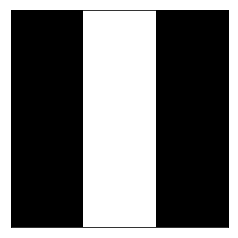

In [28]:
draw_gol_board(board)

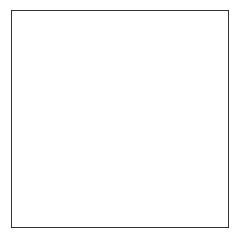

In [29]:
draw_gol_board(rtrn_board)

#### 4. Create a 100-by-100 numpy array corresponding to a Game of Life board in which all cells are dead, with the exception that the top-left 5-by-5 section of the board is as specified in the homework assignment.

In [30]:
board2 = np.reshape(np.zeros(100*100), (100,100))

In [31]:
board2[1,2] = 1
board2[2,3] = 1
board2[3,1:4] = 1

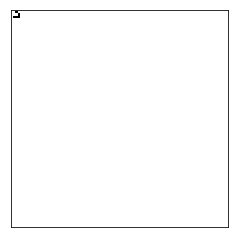

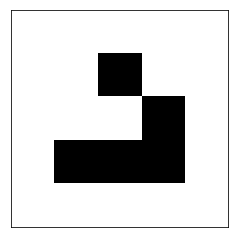

In [32]:
draw_gol_board(board2)
draw_gol_board(board2[0:5,0:5])

#### 5. Generate a plot with 5 subplots, arranged in a 5-by-1 grid, showing the first five steps of the Game of Life when started with the board you just created, with the steps ordered from top to bottom, The figure in the 5-by-5 sub-board above is called a glider, and it is interesting in that, as you can see from your plot, it seems to move along the board as you run the game.

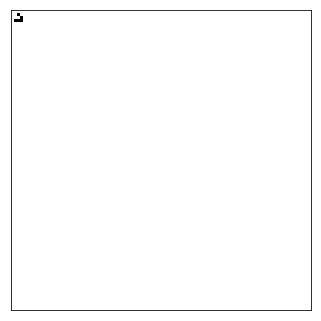

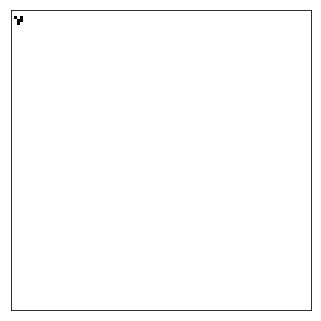

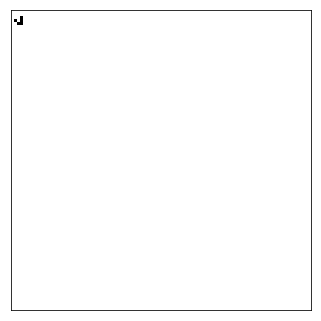

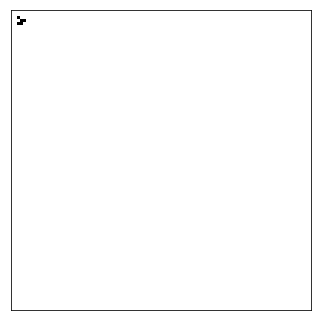

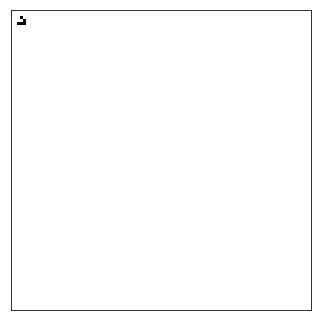

In [33]:
for subplt in range(511, 516):
    plt.figure(figsize=(36, 32))
    plt.subplot(subplt)
    draw_gol_board(board2)
    board2 = gol_step(board2)